<center><bold>

## Linear Regression From Scratch

</bold></center>

### Importing the data

In [1]:
import sklearn
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
Data = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42, bias=40)
X = Data[0]
Y = Data[1]
X.shape, Y.shape

((1000, 1), (1000,))

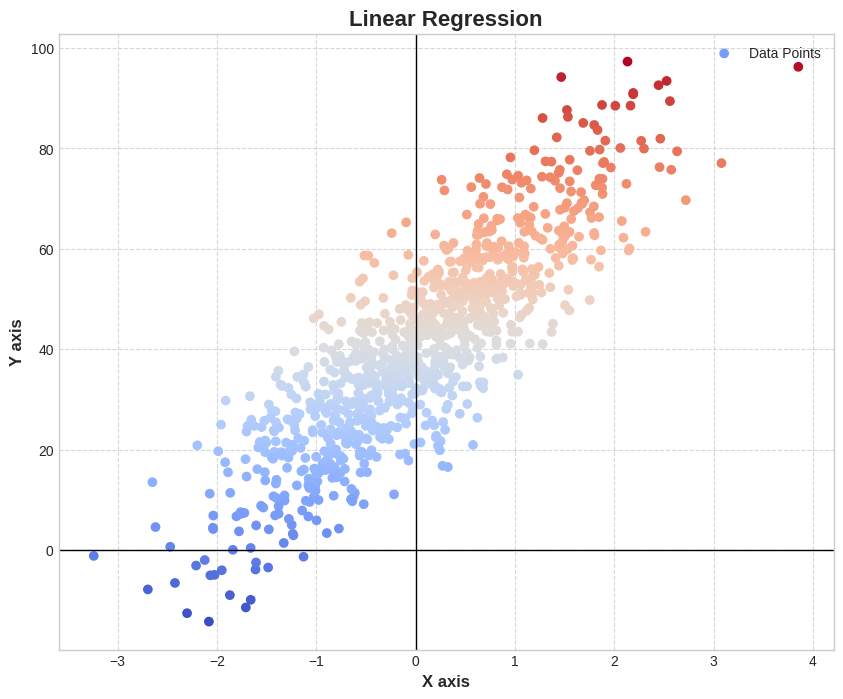

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, c=Y, cmap=plt.cm.coolwarm, label="Data Points")
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Linear Regression", fontsize=16, weight="bold")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()


### Linear Regression Model Formula

The formula for a linear regression model is:
<h4>

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
$$

</h4>
Where:

- $\ y$ = predicted output  
- $\beta_0$ = intercept (bias term)  
- $\beta_1, \beta_2, \dots, \beta_n$ = coefficients (weights)  
- $x_1, x_2, \dots, x_n$ = input features  
- $\epsilon$ = error term (residual) (NOT IMPLEMENTED IN THIS MODEL)


In [4]:
def h(X, W):
    h = W[1] * np.array(X[:, 0]) + W[0]
    return h

### Implement Linear Regreassion with Gradient Descent

#### Gradient Descent Update Rule

In gradient descent, the parameters are updated in the direction that reduces the cost function. The update rule is:
<h4>

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

</h4>

Where:

- $\theta_j$ = the $j$-th parameter (e.g., $\beta_j$ in linear regression)  
- $\alpha$ = learning rate (a small positive scalar)  
- $J(\theta)$ = cost function (e.g., Mean Squared Error for linear regression)  
- $\frac{\partial J(\theta)}{\partial \theta_j}$ = partial derivative of the cost function with respect to $\theta_j$


In [5]:
def h(X, W):
    h = W[1] * np.array(X[:, 0]) + W[0]
    return h

def loss(ypred, Y):
    l = np.mean(np.square(Y - np.array(ypred)))/2
    return l

def gradient(ypred, X):
    g = [0] * 2
    g[0] = np.mean((np.array(ypred) - Y))
    g[1] = np.mean((np.array(ypred) - Y) * X[:, 0])
    return g

def gradient_descent(X, Y, lr=0.01, epoch_limit=1000):
    W = [0, 0]
    losses = []
    j = 0
    while True:
        ypred = h(X, W)
        loss_value = loss(ypred, Y)
        g = gradient(ypred, X)
        W[0] = W[0] - lr * g[0]
        W[1] = W[1] - lr * g[1]
        losses.append(loss_value)
        print(f"Loss : {loss_value:.2f}, Weights : {W[0]:.2f}, {W[1]:.2f}, Epoch : {j}")
        j = j + 1
        if(j>epoch_limit):
            return W, losses

epochs = 1000
W_new, losses = gradient_descent(X, Y, epoch_limit=epochs)
W_new

Loss : 996.26, Weights : 0.40, 0.17, Epoch : 0
Loss : 977.27, Weights : 0.80, 0.33, Epoch : 1
Loss : 958.66, Weights : 1.20, 0.50, Epoch : 2
Loss : 940.42, Weights : 1.59, 0.66, Epoch : 3
Loss : 922.55, Weights : 1.98, 0.82, Epoch : 4
Loss : 905.03, Weights : 2.36, 0.98, Epoch : 5
Loss : 887.87, Weights : 2.74, 1.14, Epoch : 6
Loss : 871.05, Weights : 3.12, 1.29, Epoch : 7
Loss : 854.57, Weights : 3.49, 1.45, Epoch : 8
Loss : 838.42, Weights : 3.86, 1.60, Epoch : 9
Loss : 822.59, Weights : 4.22, 1.75, Epoch : 10
Loss : 807.08, Weights : 4.58, 1.90, Epoch : 11
Loss : 791.88, Weights : 4.94, 2.05, Epoch : 12
Loss : 776.99, Weights : 5.30, 2.19, Epoch : 13
Loss : 762.39, Weights : 5.65, 2.34, Epoch : 14
Loss : 748.09, Weights : 5.99, 2.48, Epoch : 15
Loss : 734.07, Weights : 6.34, 2.62, Epoch : 16
Loss : 720.34, Weights : 6.68, 2.76, Epoch : 17
Loss : 706.88, Weights : 7.01, 2.90, Epoch : 18
Loss : 693.69, Weights : 7.35, 3.04, Epoch : 19
Loss : 680.76, Weights : 7.67, 3.18, Epoch : 20
Lo

[np.float64(40.04368656388044), np.float64(16.632862768951316)]

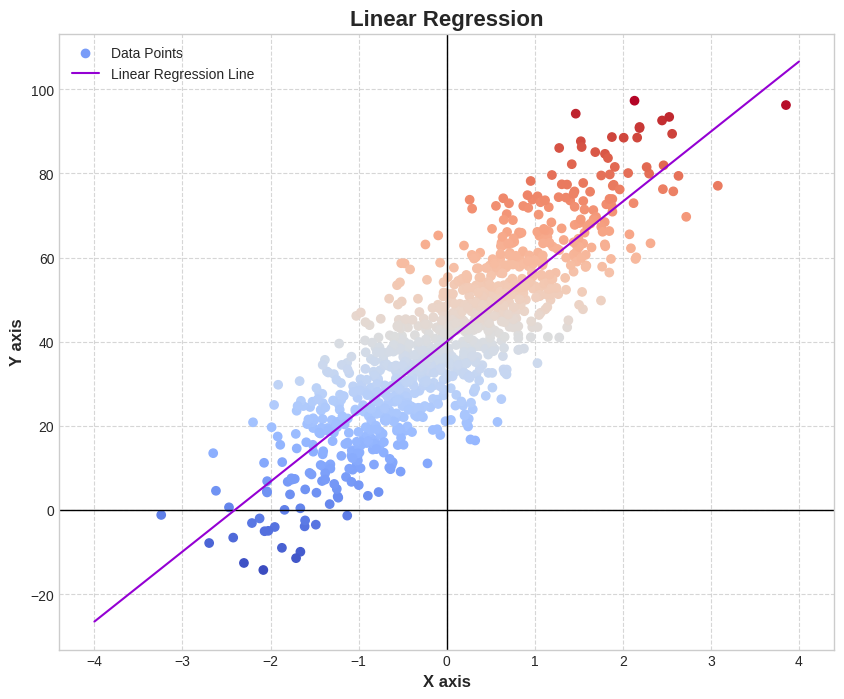

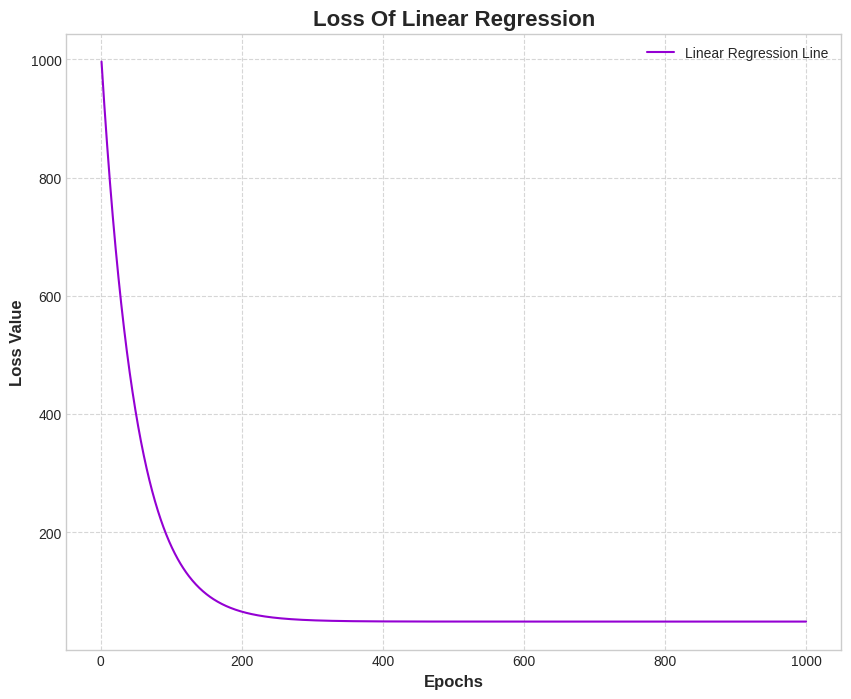

In [6]:
ypred = W_new[1] * np.linspace(-4, 4, 1000) + W_new[0]



plt.figure(figsize=(10, 8))
plt.scatter(X, Y, c=Y, cmap=plt.cm.coolwarm, label="Data Points")
plt.axhline(y=0, color='black', linewidth=1)  # X-axis line
plt.axvline(x=0, color='black', linewidth=1)  # Y-axis line
plt.title("Linear Regression", fontsize=16, weight="bold")
plt.plot(np.linspace(-4, 4, 1000), ypred, c="darkviolet", label="Linear Regression Line")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

plt.figure(figsize=(10, 8))
plt.title("Loss Of Linear Regression", fontsize=16, weight="bold")
plt.plot(np.linspace(1, epochs, epochs+1), np.array(losses), c="darkviolet", label="Linear Regression Line")
plt.xlabel("Epochs", fontsize=12, weight="bold")
plt.ylabel("Loss Value", fontsize=12, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

### Checking The Scratch Model With Scikit-Learn Library Model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_reg_line = np.linspace(-4, 4, 1000)

standardscaler = StandardScaler()

x_scaled = standardscaler.fit_transform(X)

reg_model = LinearRegression()

reg_model.fit(X, Y)

y_pred_model = reg_model.coef_[0] * x_reg_line + reg_model.intercept_

print(f"Weights : {reg_model.coef_[0]}, {reg_model.intercept_}")

Weights : 16.633546051995488, 40.04526205905821


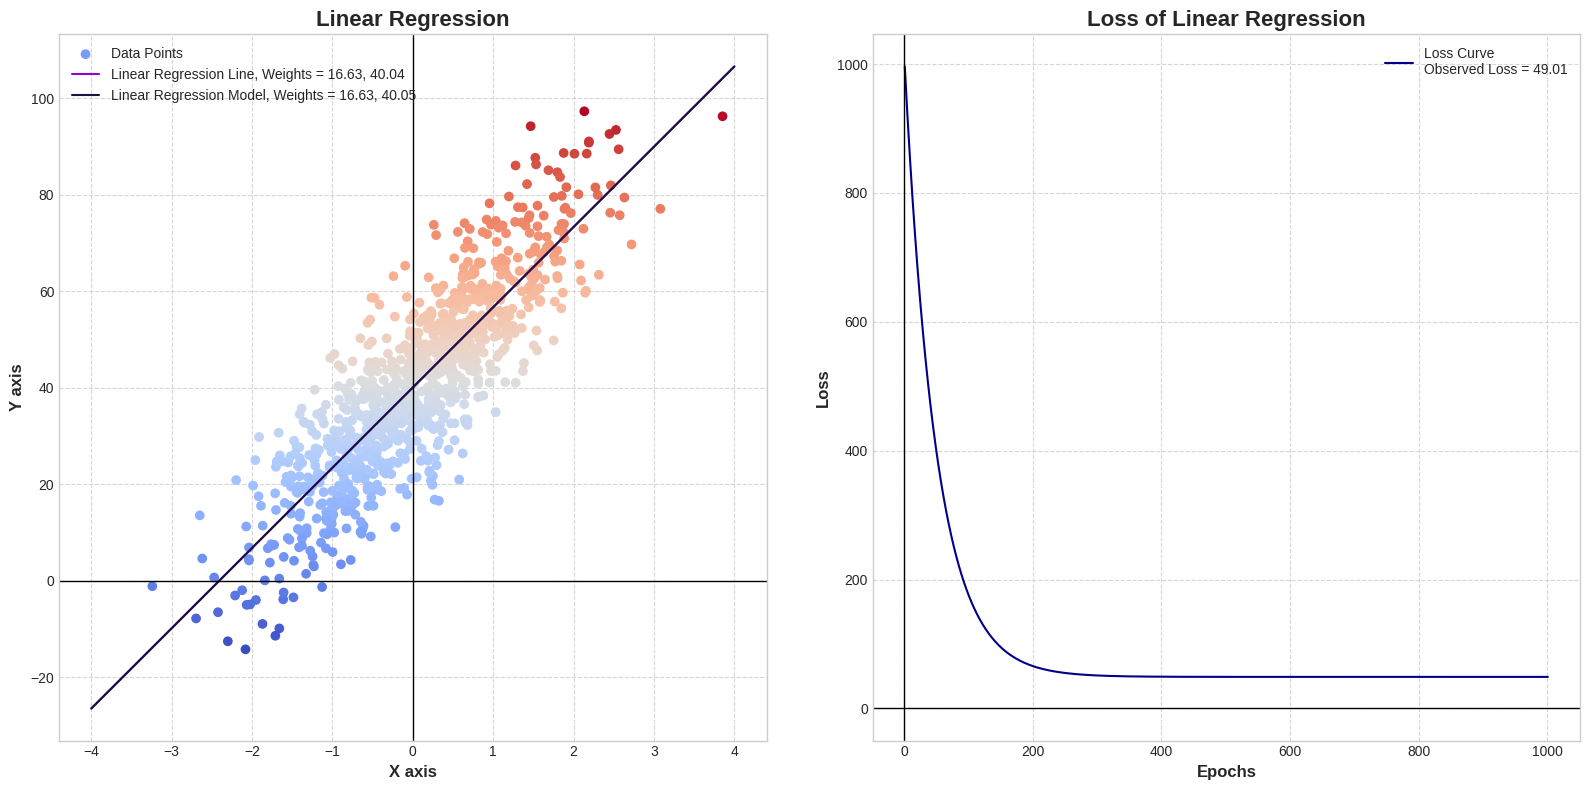

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming W_new and losses are already defined
x_vals = np.linspace(-4, 4, 1000)
ypred = W_new[1] * x_vals + W_new[0]

fig, axs = plt.subplots(1, 2, figsize=(16, 8), dpi=100)  # 2 rows, 1 column

# --- Plot 1: Regression Line ---
axs[0].scatter(X, Y, c=Y, cmap=plt.cm.coolwarm, label="Data Points")
axs[0].plot(x_vals, ypred, c="darkviolet", label=f"Linear Regression Line, Weights = {W_new[1]:.2f}, {W_new[0]:.2f}")
axs[0].plot(x_vals, y_pred_model, c="#16163b", label=f"Linear Regression Model, Weights = {reg_model.coef_[0]:.2f}, {reg_model.intercept_:.2f}")
axs[0].axhline(y=0, color='black', linewidth=1)
axs[0].axvline(x=0, color='black', linewidth=1)
axs[0].set_title("Linear Regression", fontsize=16, weight="bold")
axs[0].set_xlabel("X axis", fontsize=12, weight="bold")
axs[0].set_ylabel("Y axis", fontsize=12, weight="bold")
axs[0].legend()
axs[0].grid(linestyle="--", alpha=0.8)

# --- Plot 2: Loss Curve ---
axs[1].plot(np.linspace(1, len(losses), len(losses)), np.array(losses), c="darkblue", label=f"Loss Curve\nObserved Loss = {losses[-1]:.2f}")
axs[1].axhline(y=0, color='black', linewidth=1)
axs[1].axvline(x=0, color='black', linewidth=1)
axs[1].set_title("Loss of Linear Regression", fontsize=16, weight="bold")
axs[1].set_xlabel("Epochs", fontsize=12, weight="bold")
axs[1].set_ylabel("\n\nLoss", fontsize=12, weight="bold")
axs[1].legend()
axs[1].grid(linestyle="--", alpha=0.8)

plt.tight_layout()
plt.show()
plt.savefig("Linear.png")